# Trablho de Conclusão de Curso - UNIVESP - 1S/2025- Notebook 3

# Código: tcc530-sala-002grupo-002

## 1.0 Packges

### Packges Import

In [1]:
# Bibliotecas Gerais
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt

# Bibliotecas Classificação
from sklearn.model_selection       import train_test_split, GridSearchCV
from sklearn                       import metrics
from sklearn.preprocessing         import MinMaxScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.svm                   import SVC
from sklearn.neural_network        import MLPClassifier
from sklearn.metrics               import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import ConfusionMatrixDisplay
from sklearn.metrics               import RocCurveDisplay
from sklearn.metrics               import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection       import cross_val_score,cross_val_predict

### Packges Version Control

In [2]:
pip freeze --local > ../requeriments_not3.txt

Note: you may need to restart the kernel to use updated packages.


## 2.0 Data Read

In [3]:
link   = '../dados/dados_class.csv'
df_class = pd.read_csv(link,sep=",",low_memory=False)

In [4]:
df_class.head(5)

,Código do sexo_Feminino,Código do sexo_Masculino,Código do sexo_Sem Registro,Código da raça/cor_Amarela,Código da raça/cor_Branca,Código da raça/cor_Indígena,Código da raça/cor_Parda,Código da raça/cor_Preta,Código da raça/cor_Sem Registro,Código de escolaridade_1ª a 4ª série incompleta do EF,...,Manifestação de petéquias_Sim,Manifestação de hematúria_Não,Manifestação de hematúria_Não Realizado,Manifestação de hematúria_Sem Registro,Manifestação de hematúria_Sim,Manifestação de sangramento_Não,Manifestação de sangramento_Não Realizado,Manifestação de sangramento_Sem Registro,Manifestação de sangramento_Sim,Classificação final do caso
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,1
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,0
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,1
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,0


In [5]:
locsave = 'figures/class/'

## 3.0 Data Preparing

In [6]:
factor = 0.1
df  = df_class.sample(int(factor*df_class.shape[0]))

In [7]:
X = df.drop(columns=["Classificação final do caso"])
Y = df["Classificação final do caso"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (335732, 206)
Shape y_train: (335732,)
Shape X_test: (83933, 206)
Shape y_test: (83933,)


## 4.0 ML Models

In [9]:
# scores_list = []
# K_neighbors = range(1,20)

# for k in K_neighbors:

#   knn =  KNeighborsClassifier(n_neighbors=k)
#   knn.fit(X_train, y_train)
#   y_pred = knn.predict(X_test)
#   scores_list.append(accuracy_score(y_test, y_pred))

## 5 Vizinhos no KNN

In [10]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion="entropy"),
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy', n_estimators=150),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB(),
    'SVC_Poly': SVC(kernel='poly'),
    'SVC_Linear': SVC(kernel='linear'),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='relu'),
 }

### 4.1 Traning 1 - Test/Train Split

KNN
F1: 76.61928916330211%
              precision    recall  f1-score   support

           0       0.76      0.66      0.71     33850
           1       0.79      0.86      0.82     50083

    accuracy                           0.78     83933
   macro avg       0.78      0.76      0.77     83933
weighted avg       0.78      0.78      0.78     83933



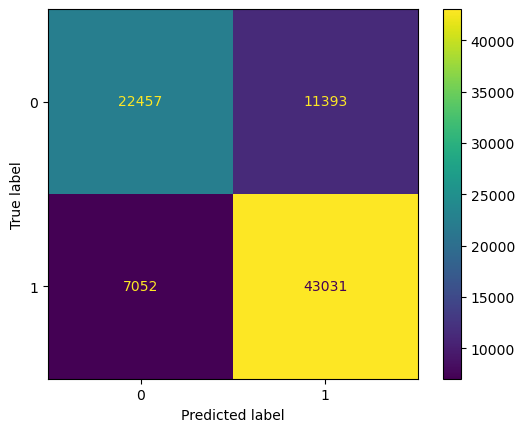

LogisticRegression
F1: 77.1266494572823%
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     33850
           1       0.77      0.92      0.84     50083

    accuracy                           0.79     83933
   macro avg       0.81      0.76      0.77     83933
weighted avg       0.80      0.79      0.78     83933



/home/felipe-notebook/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


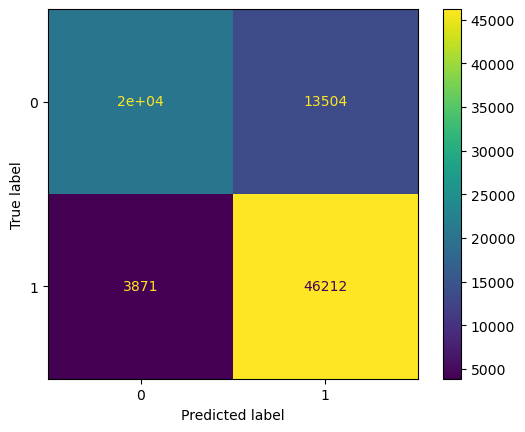

DecisionTreeClassifier
F1: 76.70544482790746%
              precision    recall  f1-score   support

           0       0.76      0.67      0.71     33850
           1       0.79      0.85      0.82     50083

    accuracy                           0.78     83933
   macro avg       0.78      0.76      0.77     83933
weighted avg       0.78      0.78      0.78     83933



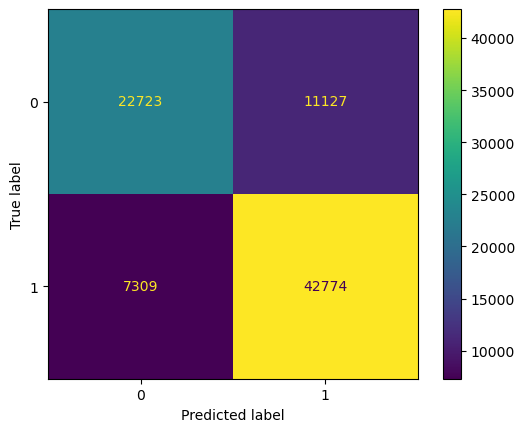

RandomForestClassifier
F1: 78.56619752461263%
              precision    recall  f1-score   support

           0       0.81      0.66      0.73     33850
           1       0.80      0.89      0.84     50083

    accuracy                           0.80     83933
   macro avg       0.80      0.78      0.79     83933
weighted avg       0.80      0.80      0.80     83933



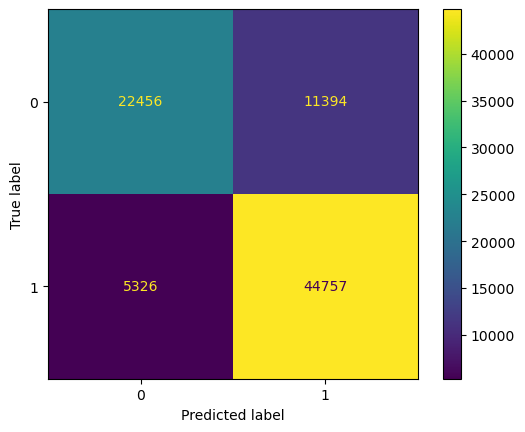

GaussianNB
F1: 29.778681790231754%
              precision    recall  f1-score   support

           0       0.41      1.00      0.58     33850
           1       0.92      0.01      0.02     50083

    accuracy                           0.41     83933
   macro avg       0.66      0.50      0.30     83933
weighted avg       0.71      0.41      0.24     83933



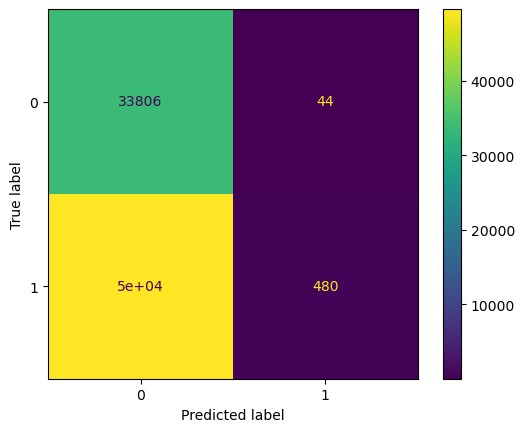

MultinomialNB
F1: 70.6329297344071%
              precision    recall  f1-score   support

           0       0.63      0.71      0.66     33850
           1       0.78      0.71      0.75     50083

    accuracy                           0.71     83933
   macro avg       0.71      0.71      0.71     83933
weighted avg       0.72      0.71      0.71     83933



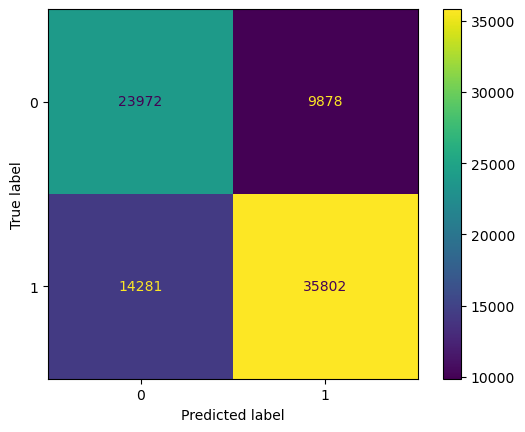

ComplementNB
F1: 70.95044434488604%
              precision    recall  f1-score   support

           0       0.62      0.74      0.68     33850
           1       0.80      0.70      0.74     50083

    accuracy                           0.71     83933
   macro avg       0.71      0.72      0.71     83933
weighted avg       0.73      0.71      0.72     83933



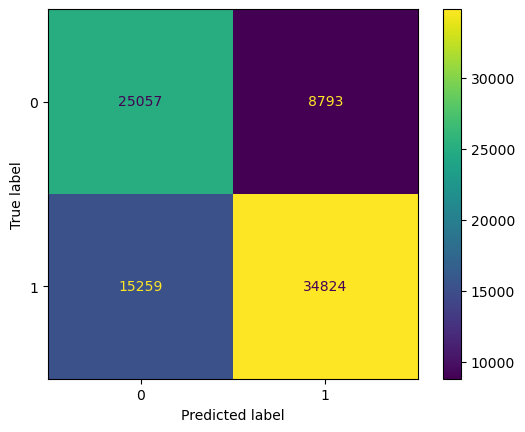

BernoulliNB
F1: 69.19089438154282%
              precision    recall  f1-score   support

           0       0.61      0.69      0.65     33850
           1       0.77      0.70      0.74     50083

    accuracy                           0.70     83933
   macro avg       0.69      0.70      0.69     83933
weighted avg       0.71      0.70      0.70     83933



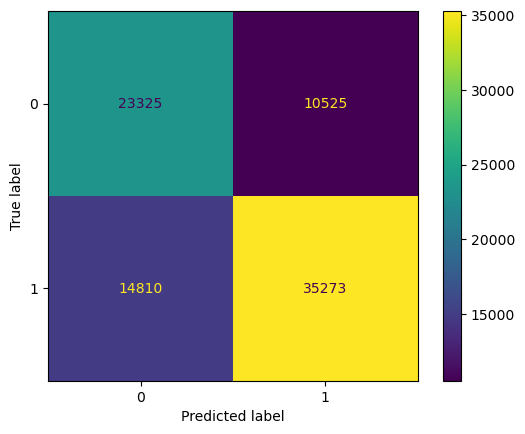

In [ ]:
f1score_list    = []
clf_list        = []

for name, model in models.items():

  clf = model
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  f1score   = np.mean(f1_score(y_test, y_pred,average=None))*100
  f1score_list.append(f1score)
  
  clf_list.append(name)
    
  print(name)
  print(f"F1: {f1score}%")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()    
  plt.grid(False)
  plt.show()

In [ ]:
df_metricas = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list})

In [ ]:
df_metricas.sort_values(by='F1-Score', ascending=False)

### 4.2 Traning 2 - Cross Validation

In [ ]:
f1score_list    = []
clf_list        = []
cv_number       = 5 

for name, model in models.items():

  clf = model
  scores = cross_val_score(clf,X,Y,cv=cv_number,scoring='f1_macro')
  clf_list.append(name)
  f1score = scores.mean()
  f1score_list.append(f1score)
 
  print(name)
  print(f"F1: {f1score}%")

In [ ]:
print('Número de Divisões com CV: %d'%cv_number)

In [ ]:
df_metricas_cv = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list})

In [ ]:
df_metricas_cv.sort_values(by='F1-Score', ascending=False)

### 4.3 Hyperparamerization

In [ ]:
n_estimators      = [100, 300, 500, 800, 1200]
max_depth         = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf  = [1, 2, 5, 10] 
hyperparam        = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf,hyperparam, cv = 3, verbose = 1, n_jobs = -1)
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
base_model = RandomForestClassifier()
base_model.fit(X_train,y_train)
y_pred     = base_model.predict(X_test)
f1score    = np.mean(f1_score(y_test, y_pred,average=None))*100
print(f"F1: {f1score}%")
print(classification_report(y_test, y_pred))

In [ ]:
best_random = rf_random.best_estimator_
best_random.fit(X_train,y_train)
y_pred     = best_random.predict(X_test)
f1score    = np.mean(f1_score(y_test, y_pred,average=None))*100
print(f"F1: {f1score}%")
print(classification_report(y_test, y_pred))